## Задача 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
exam_df = pd.read_excel('exam_results.xls')
exam_df.drop(columns=['Номер', 'ИО'], inplace=True)
exam_df.columns = ['Surname', 'Score']

# Добавим в таблицу длину фамилии
exam_df['Surname Length'] = exam_df['Surname'].apply(len)
exam_df.head()

,Surname,Score,Surname Length
0,Репенкова,16,9
1,Ролдугина,0,9
2,Сафина,19,6
3,Сидоров,26,7
4,Солоухин,21,8


In [3]:
# Зафиксируем уровень значимости и найдем критическое значение
alpha = 0.05

# Выделим выборки
Y, F = exam_df['Score'].values, exam_df['Surname Length'].values

__а)__

In [4]:
# Вычислим оценку beta метода моментов
beta_hat = Y.sum() / F.sum()
beta_hat

2.0613026819923372

In [5]:
# Вычислим выборочную корреляцию
ro_hat = np.corrcoef(Y, F)[0, 1]
ro_hat

0.025328052669147682

__Вывод:__ Видно, что корреляция практически отсутствует.

__б)__

In [6]:
def ro_star(Y, F, i):
    np.random.seed(i)
    Y_star = np.random.permutation(Y)
    return np.corrcoef(Y_star, F)[0, 1]

In [7]:
# Посчитаем значения ro_star для n_p перестановок Y
ro_stars = np.array([ro_star(Y, F, i) for i in range(10**4)])

In [8]:
# Построим Д.И.
q_l = np.quantile(ro_stars, q=alpha / 2)
q_r = np.quantile(ro_stars, q=1 - alpha / 2)
print(f'q_l = {q_l}, q_r = {q_r}')

q_l = -0.10701562205245217, q_r = 0.11016904382380786


In [9]:
# Вспомним наблюдаемое значение
ro_hat

0.025328052669147682

In [10]:
# Посчитаем p-value - количество раз, которое ro_stars превышали наблюдаемое значение, умноженное на 2
p_value = 2 * min(np.mean(ro_stars <= ro_hat), np.mean(ro_stars >= ro_hat))
p_value

0.647

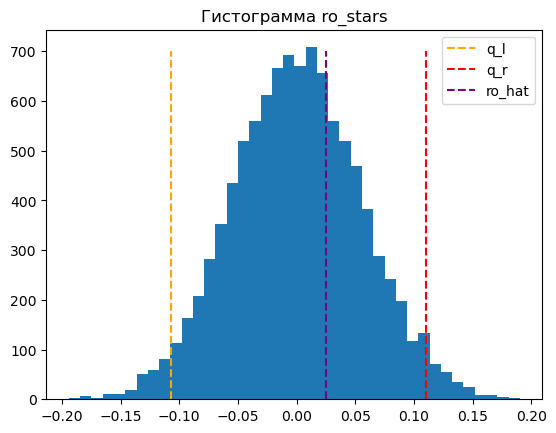

In [11]:
# Построим гистограмму и выделим на ней Д.И. и наблюдаемое значение
plt.hist(ro_stars, bins=40)

plt.vlines(q_l, 0, 700, linestyles='dashed', color='orange', label='q_l')
plt.vlines(q_r, 0, 700, linestyles='dashed', color='red', label='q_r')
plt.vlines(ro_hat, 0, 700, linestyles='dashed', color='purple', label='ro_hat')


plt.title('Гистограмма ro_stars')
plt.legend();

__Вывод:__ Видим, что наблюдаемое значение лежит внутри интервала, следовательно, гипотеза о равенстве нулю корреляции не отвергается.